In [4]:
import pandas as pd

%matplotlib inline
pd.options.display.max_columns = None

In [97]:
data = pd.read_csv("./all/test.csv")

In [98]:
data.shape

(1459, 80)

In [99]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [100]:
data.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [104]:
values = {'PoolQC': 'noPool', 'MiscFeature': 'none', 'Alley': 'noAlley', 'Fence': 'noFence', 
          'FireplaceQu': 'noFireplace', 'GarageCond': 'noGarage', 'GarageType': 'noGarage', 'GarageYrBlt': 'noGarage',
          'GarageFinish': 'noGarage', 'GarageQual': 'noGarage', 'GarageCars': 0, 'GarageArea': 0,
          'BsmtExposure': 'noBasement',  'BsmtFinType2': 'noBasement', 'BsmtFinType1': 'noBasement',
          'BsmtCond': 'noBasement', 'BsmtQual': 'noBasement', 'BsmtFinSF2': 0, 'BsmtFinSF1': 0, 
          'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0}

data = data.fillna(value=values)

cat_to_imputation = ['Exterior1st', 'Exterior2nd', 'MSZoning', 'SaleType', 'KitchenQual', 'Functional', 'Utilities']

for col in cat_to_imputation:
    data[col] = data[col].fillna(data[col].value_counts().index[0])


In [105]:
data.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage      227
MasVnrType        16
MasVnrArea        15
SaleCondition      0
Foundation         0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
BsmtQual           0
YearRemodAdd       0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
RoofStyle          0
dtype: int64

In [107]:
data[data['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,NaN,12891,Pave,noAlley,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651,Unf,0,219,870,GasA,Ex,Y,SBrkr,878,1126,0,2004,1,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002,Fin,3,644,TA,TA,Y,0,48,0,0,0,0,noPool,noFence,none,0,7,2009,WD,Normal
246,1707,20,FV,90,7993,Pave,noAlley,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1436,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,0,0,2,0,3,1,Gd,6,Typ,0,noFireplace,Attchd,2008,Fin,2,529,TA,TA,Y,0,121,0,0,0,0,noPool,noFence,none,0,10,2009,New,Partial
422,1883,60,RL,70,8749,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,885,0,1725,0,0,2,1,3,1,Gd,6,Typ,0,noFireplace,Attchd,2002,RFn,2,550,TA,TA,Y,0,48,0,0,0,0,noPool,noFence,none,0,11,2009,WD,Normal
532,1993,60,RL,NaN,7750,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,707,707,GasA,Ex,Y,SBrkr,707,707,0,1414,0,0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002,Fin,2,403,TA,TA,Y,100,35,0,0,0,0,noPool,noFence,none,0,4,2008,WD,Normal
544,2005,20,RL,87,10037,Pave,noAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666,Unf,0,794,1460,GasA,Ex,Y,SBrkr,1460,0,0,1460,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006,Fin,2,480,TA,TA,Y,0,20,0,0,0,0,noPool,noFence,none,0,8,2008,WD,Normal
581,2042,60,FV,NaN,7500,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,952,952,GasA,Ex,Y,SBrkr,952,860,0,1812,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002,RFn,2,469,TA,TA,Y,144,112,0,0,0,0,noPool,noFence,none,0,4,2008,WD,Normal
851,2312,60,RL,59,15810,Pave,noAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,768,768,GasA,Ex,Y,SBrkr,768,728,0,1496,0,0,3,0,3,1,Gd,7,Typ,0,noFireplace,Attchd,2007,Unf,2,572,TA,TA,Y,100,0,0,0,0,0,noPool,noFence,none,0,5,2007,New,Partial
865,2326,80,RL,NaN,11950,Pave,noAlley,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Ex,Y,SBrkr,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,noPool,noFence,none,0,10,2007,WD,Normal
880,2341,20,RL,85,9965,Pave,noAlley,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1528,1528,GasA,Ex,Y,SBrkr,1528,0,0,1528,0,0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007,Unf,2,480,TA,TA,Y,0,228,0,0,0,0,noPool,noFence,none,0,9,2007,New,Partial
889,2350,60,FV,112,12217,Pave,noAlley,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745,Unf,0,2

In [79]:
data['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [106]:
data.groupby(["MasVnrType"])['Id'].count().reset_index().sort_values('Id', ascending=False)

,MasVnrType,Id
2,None,878
1,BrkFace,434
3,Stone,121
0,BrkCmn,10


In [39]:
# data.groupby(['MSSubClass', 'Electrical'])['Id'].count().reset_index()

In [22]:
data[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73,9735,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,noFireplace,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,noPool,noFence,none,0,5,2008,WD,Normal,167500


In [25]:
data[data.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,noAlley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,noPool,noFence,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,noAlley,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,noFireplace,Detchd,1962,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,noPool,noFence,none,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,noAlley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,noPool,GdWo,none,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,noAlley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,noPool,noFence,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,noAlley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,noPool,MnPrv,none,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,noAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,noFireplace,Attchd,1966,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,noPool,MnPrv,none,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,noAlley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,noFireplace,Attchd,1983,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,noPool,MnPrv,none,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,noAlley,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,TA,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,noFireplace,Detchd,1977,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,noPool,MnPrv,none,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,noAlley,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,noFireplace,Attchd,1997,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,noPool,noFence,none,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,

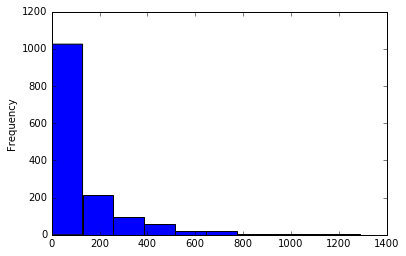

In [108]:
data["MasVnrArea"].plot(kind='hist')

In [27]:
data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
data[["LotFrontage", "LotArea"]].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000
